In [1]:
pip install neurolab

     ------------------------------------ 645.3/645.3 kB 130.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22196 sha256=8d9e98fe2cf2329cf7b7f1080f1421388c77d134349eaf78eb94620aca5743d5
  Stored in directory: c:\users\necme\appdata\local\pip\cache\wheels\1d\c0\44\7142fa43c89473c5e63a750a00224e5f9ec9ca80613de1f97d
Successfully built neurolab

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import neurolab as nl 
import matplotlib.pyplot as plt

In [5]:
myinput = [[0,0],[0,1],[1,0],[1,1]]
output = [[0],[0],[0],[1]]

In [3]:
net = nl.net.newp([[0,1],[0,1]],1)

In [6]:
error_progress = net.train(myinput,output,epochs=100,show=10,lr=1)

The goal of learning is reached


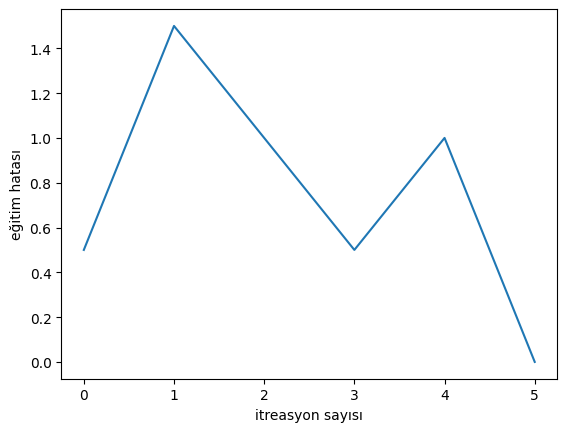

In [8]:
plt.figure()
plt.plot(error_progress)
plt.ylabel('eğitim hatası')
plt.xlabel('itreasyon sayısı')
plt.show()

In [9]:
import numpy as np

In [11]:
input_data = np.loadtxt('neural_simple.txt', delimiter = ',')
input_data

array([[2. , 4. , 0. , 0. ],
       [1.5, 3.9, 0. , 0. ],
       [2.2, 4.1, 0. , 0. ],
       [1.9, 4.7, 0. , 0. ],
       [5.4, 2.2, 0. , 1. ],
       [4.3, 7.1, 0. , 1. ],
       [5.8, 4.9, 0. , 1. ],
       [6.5, 3.2, 0. , 1. ],
       [3. , 2. , 1. , 0. ],
       [2.5, 0.5, 1. , 0. ],
       [3.5, 2.1, 1. , 0. ],
       [2.9, 0.3, 1. , 0. ],
       [6.5, 8.3, 1. , 1. ],
       [3.2, 6.2, 1. , 1. ],
       [4.9, 7.8, 1. , 1. ],
       [2.1, 4.8, 1. , 1. ]])

In [12]:
data = input_data[:,0:2]
labels = input_data[:,2:]
data,labels

(array([[2. , 4. ],
        [1.5, 3.9],
        [2.2, 4.1],
        [1.9, 4.7],
        [5.4, 2.2],
        [4.3, 7.1],
        [5.8, 4.9],
        [6.5, 3.2],
        [3. , 2. ],
        [2.5, 0.5],
        [3.5, 2.1],
        [2.9, 0.3],
        [6.5, 8.3],
        [3.2, 6.2],
        [4.9, 7.8],
        [2.1, 4.8]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]))

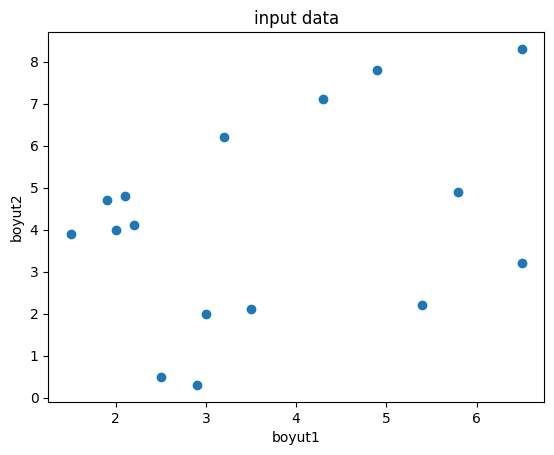

In [15]:
plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.xlabel('boyut1')
plt.ylabel('boyut2')
plt.title('input data')
plt.show()

In [17]:
dim1_min,dim1_max = data[:,0].min(), data[:,0].max()
dim2_min,dim2_max = data[:,1].min(), data[:,1].max()
dim1_min,dim1_max ,dim2_min,dim2_max

(1.5, 6.5, 0.3, 8.3)

In [18]:
nn_output_layer = labels.shape[1]
nn_output_layer

2

In [20]:
dim1 = [dim1_min,dim1_max]
dim2 = [dim2_min,dim2_max]
neural_net = nl.net.newp([dim1,dim2],nn_output_layer)#giriş çıkış ve kaç katman parametreleri

In [21]:
error = neural_net.train(data,labels,epochs = 200,show=20,lr=0.01)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
Epoch: 120; Error: 4.0;
Epoch: 140; Error: 4.0;
Epoch: 160; Error: 4.0;
Epoch: 180; Error: 4.0;
Epoch: 200; Error: 4.0;
The maximum number of train epochs is reached


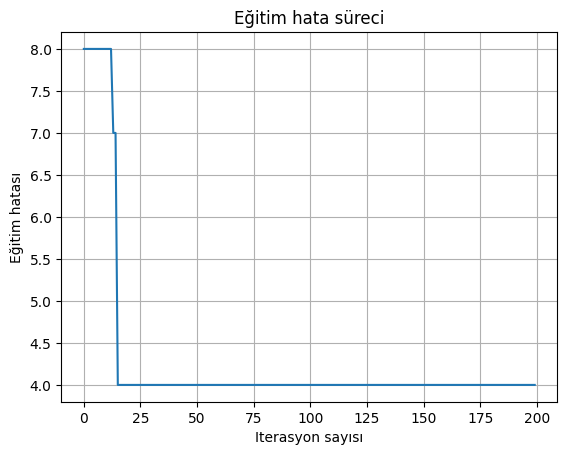

In [24]:
plt.figure()
plt.plot(error)
plt.xlabel('Iterasyon sayısı')
plt.ylabel('Eğitim hatası')
plt.title('Eğitim hata süreci')
plt.grid()
plt.show()

In [25]:
print('\nTest Result: ')
data_test = [[1.5,3.2],[3.6,1.7],[3.6,5.7]]
for item in data_test:
    print(item ,'-->', neural_net.sim([item])[0])


Test Result: 
[1.5, 3.2] --> [1. 0.]
[3.6, 1.7] --> [1. 0.]
[3.6, 5.7] --> [1. 1.]


In [27]:
#Çok katmanlı Sinir Ağları


In [28]:
#y = 2x^2+8
#x  

In [29]:
min_val = -30
max_val = 30
num_points = 160
x = np.linspace(min_val, max_val, num_points)
y = 2*np.square(x)+8
y /= np.linalg.norm(y)

In [30]:
data = x.reshape(num_points,1)
labels = y.reshape(num_points,1)

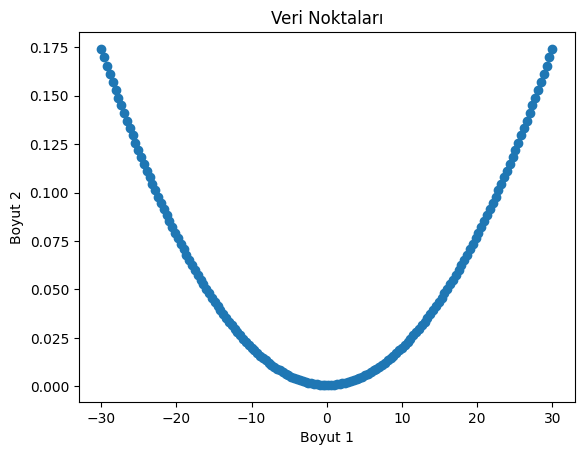

In [31]:
plt.figure()
plt.scatter(data,labels)
plt.xlabel('Boyut 1')
plt.ylabel('Boyut 2')
plt.title('Veri Noktaları')
plt.show()

In [33]:
neural_net = nl.net.newff([[min_val,max_val]],[10,6,1])
#akademik yayınlarda genelde altıgen yapıda oluşturmaya çalışıyorlar.
#Genelde(çok karmaşık değilse) 2 ile 10 arasında seçiliyor.

In [34]:
neural_net.trainf=nl.train.train_gd

In [35]:
error = neural_net.train(data, labels, epochs = 1000, show=100, goal=0.01)

Epoch: 100; Error: 0.37725847989202865;
Epoch: 200; Error: 0.09763943735533087;
Epoch: 300; Error: 0.12427070058149964;
Epoch: 400; Error: 0.03709474970778074;
Epoch: 500; Error: 0.010203285967978103;
The goal of learning is reached


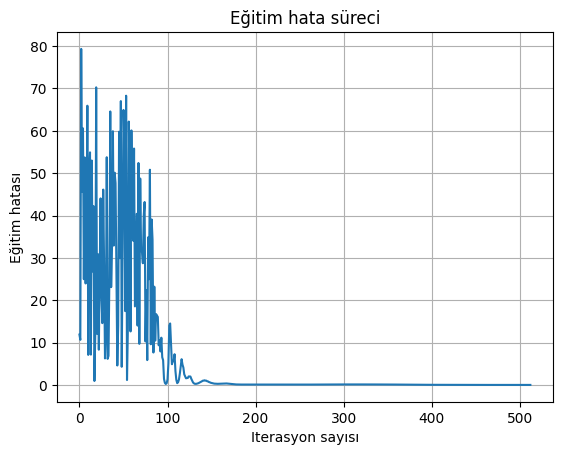

In [37]:
plt.figure()
plt.plot(error)
plt.xlabel('Iterasyon sayısı')
plt.ylabel('Eğitim hatası')
plt.title('Eğitim hata süreci')
plt.grid()
plt.show()

In [38]:
output = neural_net.sim(data)
y_pred = output.reshape(num_points)

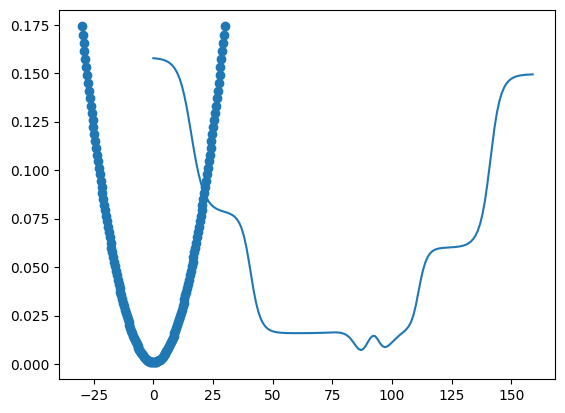

In [39]:
plt.figure()
plt.scatter(data,labels)
plt.plot(y_pred)
plt.show()


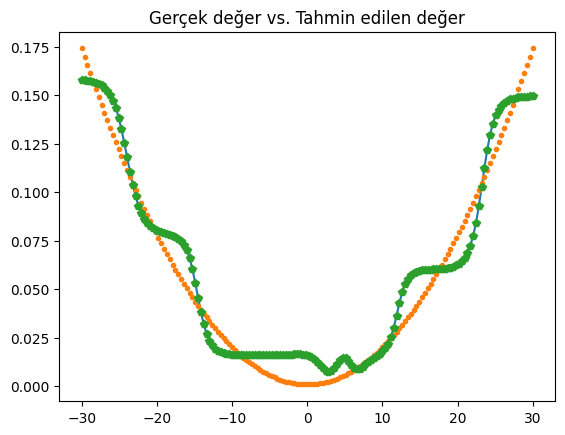

In [40]:
x_dense = np.linspace(min_val,max_val,num_points*2) #dense katmanı çıktıyla ilişkilendirilen katmandır.
y_dense_pred = neural_net.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense,y_dense_pred,'-',x,y,'.',x,y_pred,'p')
plt.title('Gerçek değer vs. Tahmin edilen değer')
plt.show()